# DSC540 Project 1

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

In [1]:
import sklearn
sklearn.__version__

'0.23.2'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [ ]:
# Your package imports here

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You can use more than one cell, if you'd like.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
       

Good Luck!

### Liz Li

**Honor Pledge:**  
I pledge on my honor that I, Liz Li, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

## Load dataset

In [4]:
# Load the dataset from UCI
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Since this dataset does not have headers, we will read the data file that I have created.
- Last column is the target column.
- The ID column is dropped.

In [6]:
df = pd.read_csv('WisconsinBreastCancer.csv')
X = df.drop('target', axis=1)
y = df.target

In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Question 1 [5 points]
How many people have cancer?

> Hint: Should be less than 300!

In [11]:
# Code here
sum(y)

212

212 number of people have cancer.

### Question 2 [5 points]
Check the data and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [20]:
# Code here
print(df.dtypes)
# there is one categorical data, 'target'


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [25]:
df.isnull().sum()
df.isna().sum()
#there is no missing values 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [29]:
X.shape
# 569 x 30 in the feature set (X) 

(569, 30)

### Question 3 [5 points]
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- What is the variable that has the largest value?
- What is the variable that has the smallest value?

In [39]:
# Code here
X.describe()
#some variables have large difference from the others, for example, max 'mean area' is 2501, and max 'mean smoothness' is 0.16

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [40]:
X.max()
#worst area has the largest value

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [41]:
X.min()
#mean concavity, mean concave points, concavity error, concave points error worst concavity, worst concave points have the smallest values 

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

### Question 4 [5 points]
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

In [43]:
# Code here
Xcorr = X.corr()
Xcorr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

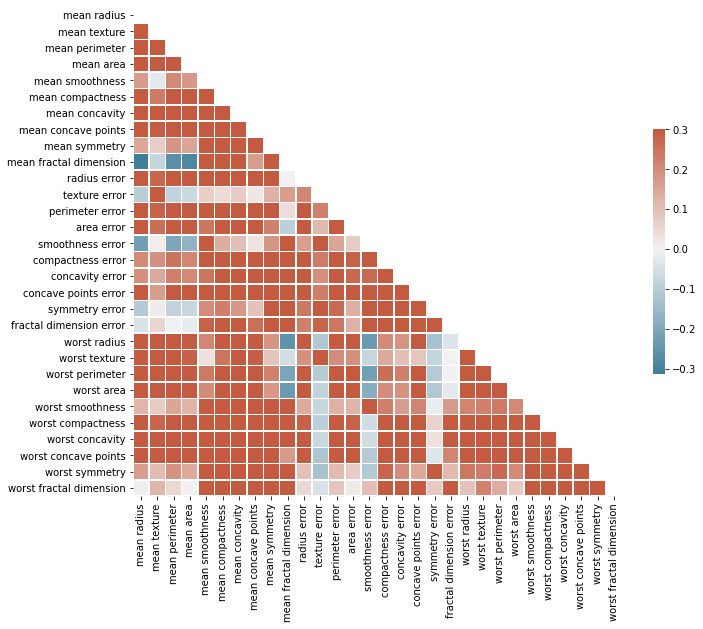

In [46]:
mask = np.triu(np.ones_like(Xcorr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(Xcorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#many features are correlated to each other. For example mean adius is correlated to area, compactness, worse radius, worse perimeter, worst area, because mathematically they are correlated. 

### Question 5 [5 points]
**Train - Test split** 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [113]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [58]:
# Code here
print(y_test.sum()/y_test.count())
print(y_train.sum()/y_train.count())
#proportion of cancer classes in train and test sets after splitting are similar, which is around 37%. 
#Since the stratified sampling divides samples in separate groups, it could increase the precision with the sample size. 

0.3706293706293706
0.3732394366197183


### Question 6 [10 points]

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [65]:
from sklearn.linear_model import LogisticRegression

In [70]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1).fit(X_train,y_train)


In [88]:
pred1 = clf.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred1)

0.9413145539906104

In [89]:
pred2 = clf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred2)

0.986013986013986

In [90]:
# Code here
sklearn.metrics.confusion_matrix(y_test, pred2)

array([[89,  1],
       [ 1, 52]])

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [79]:
# Code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
knn.predict(X_test)[0:5]


array([0, 0, 1, 0, 1])

In [92]:
pred3 = knn.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred3)

1.0

In [93]:
pred4 = knn.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred4)

0.9440559440559441

In [94]:
sklearn.metrics.confusion_matrix(y_test, pred4)

array([[86,  4],
       [ 4, 49]])

In [97]:
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### Question 8 [10 points]

- Initiate the Gaussian Naive Bayes classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [99]:
# Code here
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)


GaussianNB()

In [100]:
GNB_pred1 = GNB.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = GNB_pred1)

0.9366197183098591

In [101]:
GNB_pred2 = knn.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = GNB_pred2)

0.9440559440559441

In [102]:
sklearn.metrics.confusion_matrix(y_test, GNB_pred2)

array([[86,  4],
       [ 4, 49]])

In [103]:
print(classification_report(y_test, GNB_pred2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### Question 9 [10 points]

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Plot the validation curve based on each C value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [126]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []

for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    # Code here
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_train,y_pred))
    y_pred = clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_test,y_pred))

In [127]:
accuracy_train

[0.9248826291079812,
 0.931924882629108,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347,
 0.9413145539906104,
 0.9413145539906104,
 0.9460093896713615,
 0.9483568075117371,
 0.9507042253521126,
 0.9624413145539906,
 0.971830985915493,
 0.9765258215962441,
 0.9859154929577465,
 0.9882629107981221,
 0.9859154929577465,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221]

In [128]:
accuracy_test

[0.9370629370629371,
 0.958041958041958,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.9790209790209791,
 0.986013986013986,
 0.993006993006993,
 0.986013986013986,
 0.986013986013986,
 0.986013986013986,
 0.9790209790209791,
 0.972027972027972,
 0.9790209790209791]

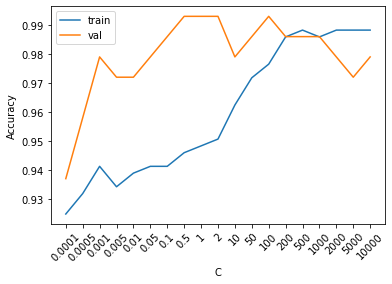

In [132]:
# Code here
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'val')
plt.xticks(np.arange(len(C_list)), C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Question 10 [10 points]

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [133]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    # Code here
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_train,y_pred))
    y_pred = clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_test,y_pred))

In [134]:
accuracy_train

[1.0,
 0.9483568075117371,
 0.9460093896713615,
 0.9389671361502347,
 0.931924882629108,
 0.9248826291079812,
 0.9272300469483568,
 0.9248826291079812,
 0.9225352112676056,
 0.9225352112676056,
 0.9225352112676056,
 0.9131455399061033,
 0.9084507042253521,
 0.9014084507042254]

In [135]:
accuracy_test

[0.9440559440559441,
 0.965034965034965,
 0.9370629370629371,
 0.9440559440559441,
 0.9370629370629371,
 0.9440559440559441,
 0.9440559440559441,
 0.9370629370629371,
 0.9370629370629371,
 0.9370629370629371,
 0.9300699300699301,
 0.9230769230769231,
 0.9300699300699301,
 0.9090909090909091]

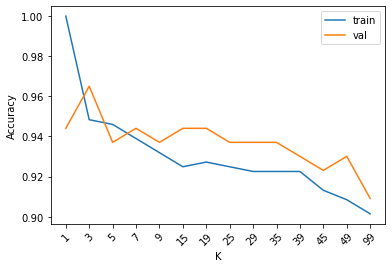

In [136]:
# Code here
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'val')
plt.xticks(np.arange(len(K_list)), K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Question 11 [10 points]

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data and re-do Quesion 9 and plot the validation curve for logistic regression models with same parameter range for C. 
- Plot the validation curve. What do you see? 
- Which value would you choose for C in logistic regression? Why?

In [137]:
from sklearn import preprocessing

In [138]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [139]:
# Code here

accuracy_train = []
accuracy_test = []

for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    # Code here
    clf.fit(X_train_ss, y_train)
    y_pred = clf.predict(X_train_ss)
    accuracy_train.append(metrics.accuracy_score(y_train,y_pred))
    y_pred = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_test,y_pred))



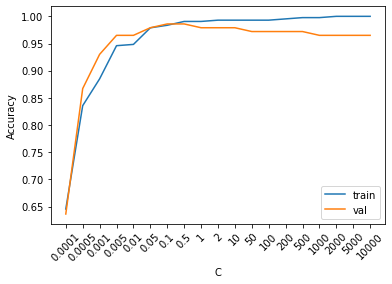

In [140]:
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'val')
plt.xticks(np.arange(len(C_list)), C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [141]:
####I would choose C =0.05, since its the elbow, and accuracy does not increase much after that point 

### Question 12 [5 points]

In [142]:
X_train_ss.shape

(426, 30)

In [143]:
X_train_ss[0:426,:].shape

(426, 30)

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value, and the other parameters the same as before.
- Starting from 1 data point in the training set, increase your training set size by 1 point in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [144]:
X_train_ss.shape

(426, 30)

In [164]:
# Code here
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LogisticRegression(),
X = X_train_ss, y = y_train, train_sizes = [1, 340])

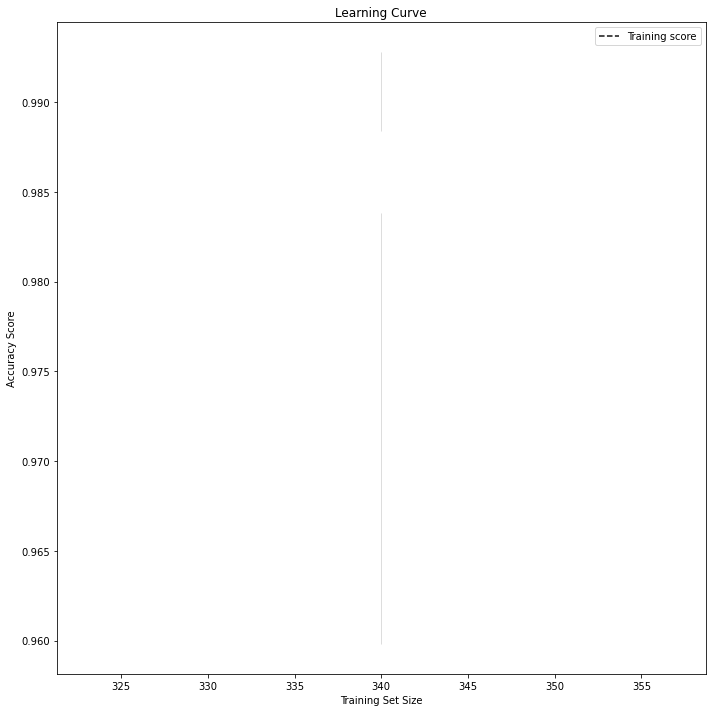

In [165]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Question 13 [5 points]

- Before applying KNN, it is important to scale the features. 
- Use the standardized train and test sets re-do Quesion 10 and plot the validation curve for KNN models with same parameter range for K. 
- Plot the validation curve. What do you see? 
- Which value would you choose for K in nearest neighbor model?

In [170]:
# Code here
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    # Code here
    clf.fit(X_train_ss, y_train)
    y_pred = clf.predict(X_train_ss)
    accuracy_train.append(metrics.accuracy_score(y_train,y_pred))
    y_pred = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_test,y_pred))

In [171]:
accuracy_train

[1.0,
 0.9835680751173709,
 0.9788732394366197,
 0.971830985915493,
 0.971830985915493,
 0.9577464788732394,
 0.960093896713615,
 0.9530516431924883,
 0.9483568075117371,
 0.9530516431924883,
 0.9530516431924883,
 0.9460093896713615,
 0.9483568075117371,
 0.9248826291079812]

In [172]:
accuracy_test

[0.951048951048951,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.951048951048951]

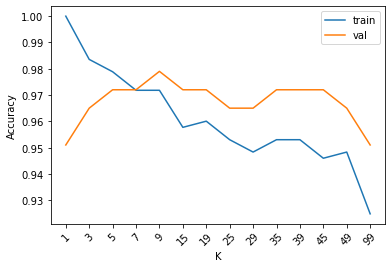

In [173]:
# Code here
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'val')
plt.xticks(np.arange(len(K_list)), K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Question 14 [10 points]
- Using only the classifier models of logistic regression, Gaussian Naive Bayes, or KNN models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement one of the methods you proposed. 
    - Is the model accuracy increasing? Why do you think this might have helped?
    - If it not increasing, try the other method you proposed. Why do you think this might have helped?
    - If none of them did not improve, comment on why this might have been the case.
    - If you have time try a few more solutions and see which one works. 

In [ ]:
#### use cross validation to improve accuracy, or smote to oversample the data to have a larger training set to improve accuracy 

In [175]:
# Code here
#cross validation 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.93023256 0.95348837 0.88372093 0.97674419 0.93023256 0.93023256
 0.92857143 0.97619048 0.9047619  0.92857143]
